2750*2750: 7562500 1/10 segment from fileis:  756250


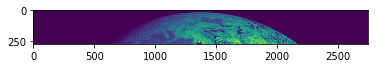

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jul 23 21:12:32 2018

@author: Administrator
"""

import struct
import numpy as np
import matplotlib.pyplot as plt

fin = open('IMG_DK01B04_201709270000_001', 'rb') # 打开读入二进制文件.
#读第一个header
buf = fin.read(1)
buf = fin.read(2)
buf = fin.read(1)
buf = fin.read(4)
tmp=struct.unpack('4B', buf)
tmp_dis=tmp
Total_Header_Length=tmp[0]*pow(256,3)+tmp[1]*pow(256,2)+tmp[2]*pow(256,1)+tmp[3]*pow(256,0)
######
buf = fin.read(8)
tmp=struct.unpack('8B', buf)
Data_Field_Leng=tmp[0]*pow(256,7)+tmp[1]*pow(256,6)+tmp[2]*pow(256,5)+tmp[3]*pow(256,4)+tmp[4]*pow(256,3)+tmp[5]*pow(256,2)+tmp[6]*pow(256,1)+tmp[7]*pow(256,0)
#读Image structure第二个header
fin.seek(16,0)
buf = fin.read(1)
tmp=struct.unpack('1B', buf)
a2_1=tmp [0]

buf = fin.read(2)
tmp=struct.unpack('2B', buf)
a2_2=tmp[0]*256+tmp[1] 

buf = fin.read(1)
tmp=struct.unpack('1B', buf)
NB=tmp[0]

buf = fin.read(2)
tmp=struct.unpack('2B', buf)
NC=tmp[0]*256+tmp[1]

buf = fin.read(2)
tmp=struct.unpack('2B', buf)
NL=tmp[0]*256+tmp[1]

buf = fin.read(1)
######
###验证HIRT bytes总数无误
num_ref=2750*2750
num_data=int(  (Data_Field_Leng/8)/2  )# 8 bits2bytes   16bits(2bytes) per pixel
print("2750*2750:",num_ref,"1/10 segment from fileis: ",num_data)
n_all_byte=Total_Header_Length+int(Data_Field_Leng/8)
fin.seek(0,0)
buf = fin.read(n_all_byte)
buf_dis = fin.read(1)
#######
###读取数据
fin.seek(Total_Header_Length,0)
dat_ori=np.zeros(NC*NL)
for i in range(NC*NL):
    buf = fin.read(2)
    tmp=struct.unpack('2B', buf)
    val=tmp[0]*256+tmp[1]
    dat_ori[i]=val
#dat_ori=np.asfortranarray(dat_ori)
dat=dat_ori.reshape([NL,NC])
#dat=np.zeros([NC,NL])
#for i in range(NC):
#    for j in range(NL):
#        dat[i,j]=dat_ori[i+NC*(j-1)]
plt.imshow(dat)
plt.show()

fin.close()